In [83]:
import jovian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from IPython.display import display, Image
import cv2
import tensorflow as tf
import os
path=os.getcwd()

<IPython.core.display.Javascript object>

In [3]:
train_df = pd.read_csv("./data/dataset/train.csv")
test_df = pd.read_csv("./data/dataset/test.csv")

print("Train shape: ",train_df.shape)
print("Test shape: ",test_df.shape)

Train shape:  (364, 2)
Test shape:  (156, 1)


In [4]:
train_df.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [10]:
print("Unique name: ",list(train_df['target'].unique()))
print("Length: ",len(list(train_df['target'].unique())))

Unique names:  ['manipuri', 'bharatanatyam', 'odissi', 'kathakali', 'kathak', 'sattriya', 'kuchipudi', 'mohiniyattam']
Length:  8


In [19]:
print("Target count in each class")
train_df['target'].value_counts()

Target count in each class


mohiniyattam     50
odissi           49
bharatanatyam    47
kathakali        47
kuchipudi        46
sattriya         45
kathak           44
manipuri         36
Name: target, dtype: int64

In [54]:
targets=list(train_df['target'].unique())
images=[train_df[train_df['target']==targets[index]]['Image'].values[0] for index in range(len(targets))]

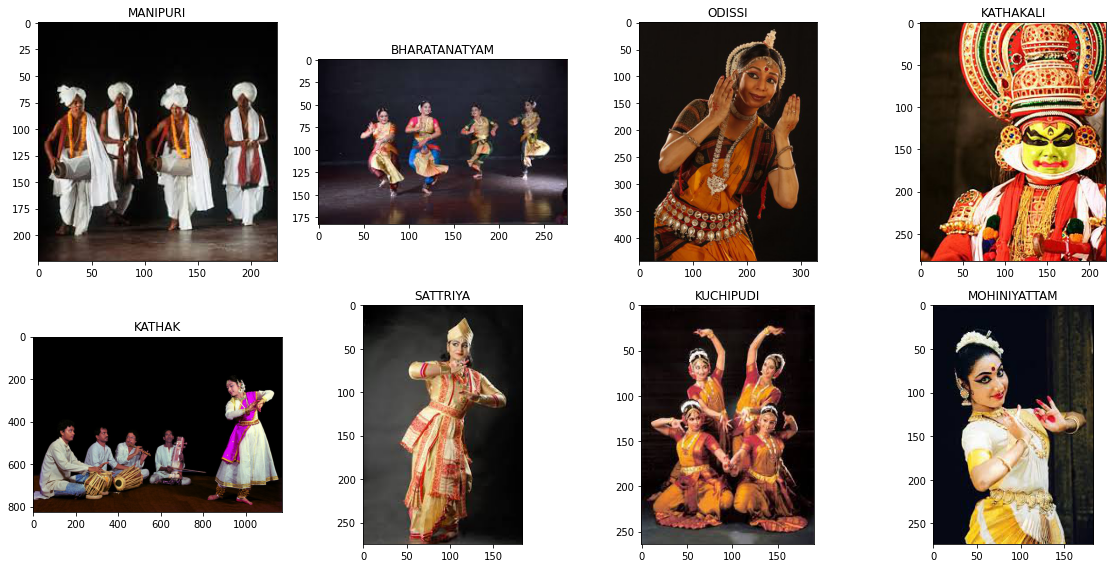

In [68]:

width=5
height=5
rows = 2
cols = 4
axes=[]
fig=plt.figure(figsize=(16, 8))

for a in range(rows*cols):
    image_path=os.path.join(path,'data','dataset','train',images[a])
    image = mpimg.imread(image_path)
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(str(target[a]).upper())
    axes[-1].set_title(subplot_title)  
    plt.imshow(image)
fig.tight_layout()    
plt.show()

In [69]:
X = np.array(train_df['Image'])
y = np.array(train_df['target'])

In [75]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=42,
)

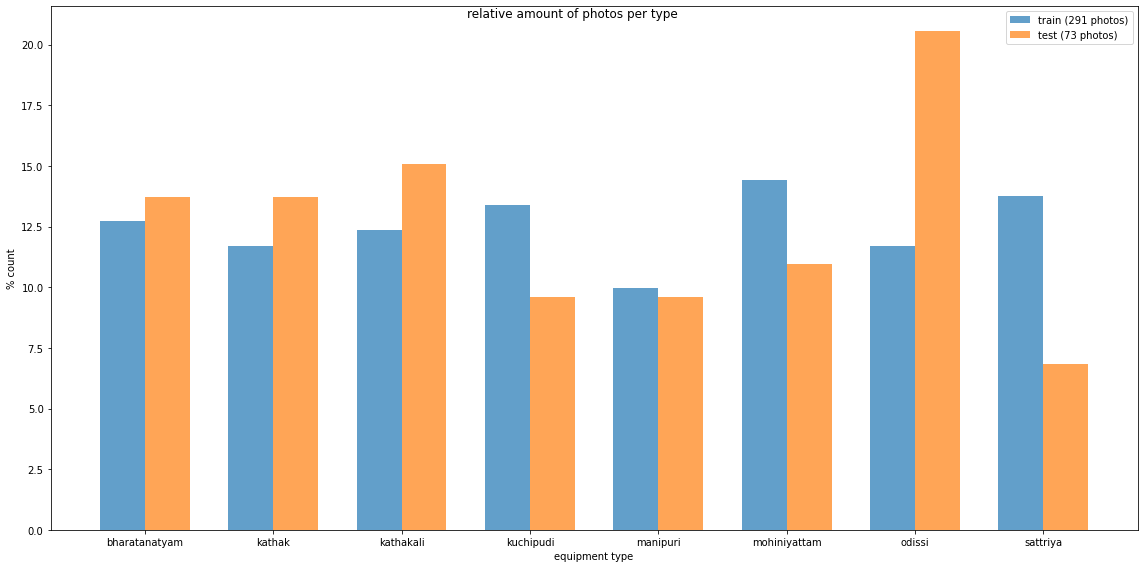

In [76]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
 
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
 
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
 
    xtemp = np.arange(len(unique))
 
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
fig=plt.figure(figsize=(16, 8))
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)),
    'test ({0} photos)'.format(len(y_test))
]);
fig.tight_layout()    
plt.show()

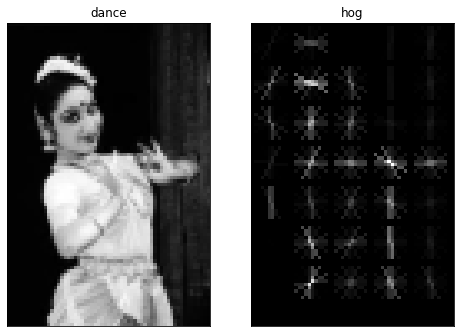

In [79]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
 
dance = imread(image_path, as_grey=True)
 
# scale down the image to one third
dance = rescale(dance, 1/3, mode='reflect')
# calculate the hog and return a visual representation.
dance_hog, dance_hog_img = hog(
    dance, pixels_per_cell=(12, 12),
    cells_per_block=(2,2),
    orientations=8,
    visualise=True,
    block_norm='L2-Hys')
 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    for a in ax]
 
ax[0].imshow(dance, cmap='gray')
ax[0].set_title('dance')
ax[1].imshow(dance_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

In [81]:
print('number of pixels: ', dance.shape[0] * dance.shape[1])
print('number of hog features: ', dance_hog.shape[0])

number of pixels:  5551
number of hog features:  768


In [85]:
# ! pip install jovian --upgrade
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "12345k/training" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


TypeError: invalid cmd type (<class 'NoneType'>, expected string)